# NYC Subway Analysis
## By Thomas Crough

This is the final project for Udacity's Intro to Data Science course. It includes data exploration and visualization in addition to statistical analysis and application of machine learning.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp
import sklearn

df = pd.read_csv("C:\\Users\\Thomas\\Workspace 2\\turnstile_weather_v2.csv")

In [13]:
df.columns

Index(['UNIT', 'DATEn', 'TIMEn', 'ENTRIESn', 'EXITSn', 'ENTRIESn_hourly',
       'EXITSn_hourly', 'datetime', 'hour', 'day_week', 'weekday', 'station',
       'latitude', 'longitude', 'conds', 'fog', 'precipi', 'pressurei', 'rain',
       'tempi', 'wspdi', 'meanprecipi', 'meanpressurei', 'meantempi',
       'meanwspdi', 'weather_lat', 'weather_lon'],
      dtype='object')

In [14]:
## df.groupby('DATEn')['fog'].sum()
## Output shows there are only 4 days with fog

df.describe()

## df.groupby('DATEn')['rain'].sum()
## Output shows 10 rainy days

## df.groupby('DATEn')['weather_lat'].nunique()
## df.groupby('DATEn')['weather_lon'].nunique()
## Output shows there are 37 unique weather stations 

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,longitude,fog,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
count,4.264900e+04,4.264900e+04,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,...,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000
mean,2.812486e+07,1.986993e+07,1886.589955,1361.487866,10.046754,2.905719,0.714436,40.724647,-73.940364,0.009824,...,29.971096,0.224741,63.103780,6.927872,0.004618,29.971096,63.103780,6.927872,40.728555,-73.938693
std,3.043607e+07,2.028986e+07,2952.385585,2183.845409,6.938928,2.079231,0.451688,0.071650,0.059713,0.098631,...,0.137942,0.417417,8.455597,4.510178,0.016344,0.131158,6.939011,3.179832,0.065420,0.059582
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,40.576152,-74.073622,0.000000,...,29.550000,0.000000,46.900000,0.000000,0.000000,29.590000,49.400000,0.000000,40.600204,-74.014870
25%,1.039762e+07,7.613712e+06,274.000000,237.000000,4.000000,1.000000,0.000000,40.677107,-73.987342,0.000000,...,29.890000,0.000000,57.000000,4.600000,0.000000,29.913333,58.283333,4.816667,40.688591,-73.985130
50%,1.818389e+07,1.331609e+07,905.000000,664.000000,12.000000,3.000000,1.000000,40.717241,-73.953459,0.000000,...,29.960000,0.000000,61.000000,6.900000,0.000000,29.958000,60.950000,6.166667,40.720570,-73.949150
75%,3.263049e+07,2.393771e+07,2255.000000,1537.000000,16.000000,5.000000,1.000000,40.759123,-73.907733,0.000000,...,30.060000,0.000000,69.100000,9.200000,0.000000,30.060000,67.466667,8.850000,40.755226,-73.912033
max,2.357746e+08,1.493782e+08,32814.000000,34828.000000,20.000000,6.000000,1.000000,40.889185,-73.755383,1.000000,...,30.320000,1.000000,86.000000,23.000000,0.157500,30.293333,79.800000,17.083333,40.862064,-73.694176


# Statistical Tests

In [15]:
              
    
## Exclude weekends
df_rain = df.loc[(df['rain'] == 1) & (df['weekday'] == 1)]
df_dry = df.loc[(df['rain'] == 0) & (df['weekday'] == 1)]

In [16]:
print("Shape of rain DF", df_rain.shape)
print("Shape of dry DF", df_dry.shape)



Shape of rain DF (7900, 27)
Shape of dry DF (22570, 27)


In [17]:

print("Mean ridership on days with rain: ", df_rain.ENTRIESn_hourly.mean())
print("")
print("Mean ridership on dry days: ", df_dry.ENTRIESn_hourly.mean())
print("")
result = sp.stats.ttest_ind(df_rain.ENTRIESn_hourly, df_dry.ENTRIESn_hourly, equal_var=False)
print(result)

Mean ridership on days with rain:  2227.9612658227848

Mean ridership on dry days:  2133.5696942844484

Ttest_indResult(statistic=2.1475045262218453, pvalue=0.031771249123297894)


The p-value (.0318) returned by the T-test is significant at the 10% level suggesting, on weekdays, more people use the subways in NYC when it rains vs. when it is dry.

The visualizations provided below show that the distributions of the two samples are strongly skewed right drawing into question the validity of this test (normal distribution is an assumption).

In [18]:
## Test weekends

df_rain_we = df.loc[(df['rain'] == 1) & (df['weekday'] == 0)]
df_dry_we = df.loc[(df['rain'] == 0) & (df['weekday'] == 0)]

print("Shape of rain DF (weekend)", df_rain_we.shape)
print("Shape of dry DF (weekend)", df_dry_we.shape)


Shape of rain DF (weekend) (1685, 27)
Shape of dry DF (weekend) (10494, 27)


In [19]:
print("Mean ridership on days with rain (weekend): ", df_rain_we.ENTRIESn_hourly.mean())
print("")
print("Mean ridership on dry days (weekend): ", df_dry_we.ENTRIESn_hourly.mean())
print("")
result = sp.stats.ttest_ind(df_rain_we.ENTRIESn_hourly, df_dry_we.ENTRIESn_hourly, equal_var=False)
print(result)

Mean ridership on days with rain (weekend):  1091.6112759643918

Mean ridership on dry days (weekend):  1226.057556699066

Ttest_indResult(statistic=-3.2201553692552518, pvalue=0.0012983730560947027)


With a p-value of .0013 the results of this test are stastically significant at the 1% level. Because mean ridership for rainy days is lower than dry days in this case our test suggests rain does decrease subway use on weekends.

Once again the data is strongly skewed right (plot shown below).

# Visualizations

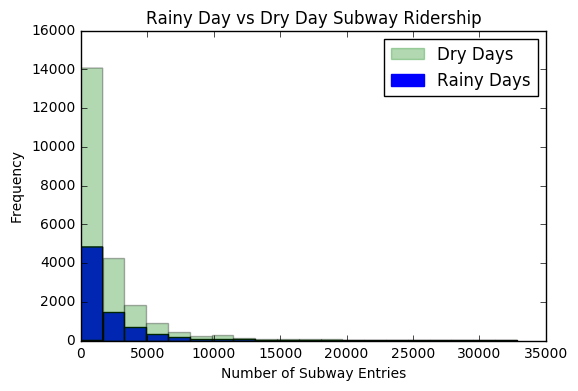

In [20]:
import matplotlib.patches as mpatches

hist_max = df.ENTRIESn_hourly.max()
hist_min = df.ENTRIESn_hourly.min()

hist1 = plt.hist(df_rain.ENTRIESn_hourly, bins=20, range=[hist_min, hist_max], facecolor='blue')
hist2 = plt.hist(df_dry.ENTRIESn_hourly, bins=20, range=[hist_min, hist_max], facecolor='green', alpha=.3)

green = mpatches.Patch(color='green', alpha=.3, label='Dry Days')
blue = mpatches.Patch(color='blue', label='Rainy Days')
plt.legend(handles=[green, blue])

plt.title('Rainy Day vs Dry Day Subway Ridership')
plt.xlabel('Number of Subway Entries')
plt.ylabel('Frequency')
plt.show()
plt.clf()

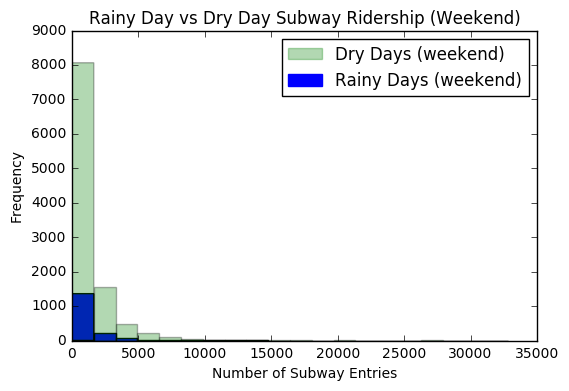

In [27]:
hist1 = plt.hist(df_rain_we.ENTRIESn_hourly, bins=20, range=[hist_min, hist_max], facecolor='blue')
hist2 = plt.hist(df_dry_we.ENTRIESn_hourly, bins=20, range=[hist_min, hist_max], facecolor='green', alpha=.3)

green = mpatches.Patch(color='green', alpha=.3, label='Dry Days (weekend)')
blue = mpatches.Patch(color='blue', label='Rainy Days (weekend)')
plt.legend(handles=[green, blue])

plt.title('Rainy Day vs Dry Day Subway Ridership (Weekend)')
plt.xlabel('Number of Subway Entries')
plt.ylabel('Frequency')
plt.show()
plt.clf()

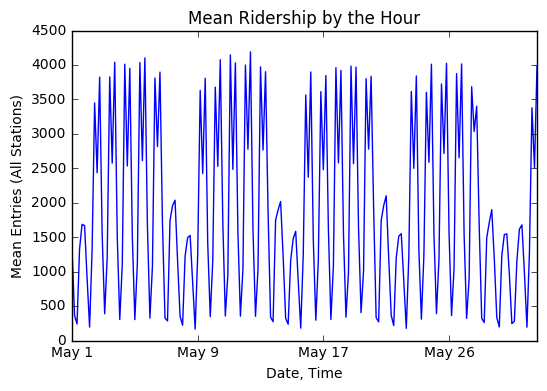

In [21]:

ticks = ['May 1', 'May 9', 'May 17', 'May 26']
plot = df.groupby(['DATEn', 'TIMEn'])['ENTRIESn_hourly'].mean().plot(title="Mean Ridership by the Hour")
plot.set_xticklabels(ticks)
plot.set_xlabel("Date, Time")
plot.set_ylabel("Mean Entries (All Stations)")
plt.show()
plt.clf()

In [22]:
## Plots hourly totals 

##ticks = ['May 1', 'May 9', 'May 17', 'May 26']
##plot1 = df.groupby(['DATEn', 'TIMEn'])['ENTRIESn_hourly'].sum().plot(title="Total Ridership by the Hour")
##plot1.set_xticklabels(ticks)
##plot1.set_xlabel("Date, Time")
##plot1.set_ylabel("Total Entries (All Stations)")
##plt.show()

# Regression

In [23]:
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor

In [24]:
df_feat = df.filter(['TIMEn', 'meantempi', 'weekday', 'EXITSn_hourly', 'conds'], axis=1)
## df_feat = pd.concat([df_feat, pd.get_dummies(df_feat['TIMEn'])], axis=1)
##df_feat = df_feat.drop(['TIMEn', 'conds'], axis=1)
df_feat = pd.get_dummies(df_feat)
## print(df_feat.head())
## print("")
feat = df_feat.values
feat_norm = preprocessing.scale(feat)
## print(feat)
df_target = df['ENTRIESn_hourly']
## print("")
target = df_target.values

lr = linear_model.LinearRegression()
lr.fit(feat_norm, target)
print("Linear Regression R^2: ", lr.score(feat_norm, target))

Linear Regression R^2:  0.441196106819


In [25]:
clf = svm.SVR(kernel='linear')
## RBF kernel yielded an R^2 of .06
clf.fit(feat_norm, target)
print("SVM regressor R^2: ", clf.score(feat_norm, target))

SVM regressor R^2:  0.391821651034


In [26]:
rfr = RandomForestRegressor()
rfr.fit(feat_norm, target)
print("Random Forest Regressor R^2: ", rfr.score(feat_norm, target))


Random Forest Regressor R^2:  0.915978551889


- The random forest regressor produced the best results with an R^2 value of .9160
- Variables used as input: Time, Mean Temperature, Weekday, Exits Hourly, and Conditions